<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> 📊 Zomato Bangalore Restaurant Trends </b></div>

<a id="1"></a>
# <div style="padding:20px;color:brown;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:lightyellow;overflow:hidden"><b> Importing all necessary Libraries</b></div>

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.display import display, HTML
import time


/var/folders/np/t2l3ndmn5nq7ny2gk9bg61mh0000gn/T/ipykernel_66409/2104416550.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


### Loading the Dataframe

In [2]:
data = pd.read_csv("zomato_data.csv")

In [3]:
data.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


<a id="1"></a>
# <div style="padding:20px;color:brown;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:lightyellow;overflow:hidden"><b> Basic Details of the Data</b></div>

#### 1. Shape of the Dataset

In [4]:
print(f"Zomato data has {data.shape[0]} rows and {data.shape[1]} columns")

Zomato data has 51717 rows and 10 columns


#### 2. Columns of the Dataset

In [5]:
data.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'rest_type',
       'dish_liked', 'cuisines', 'approx_costfor_two_people', 'listed_intype',
       'listed_incity'],
      dtype='object')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* online_order: Indicates if online ordering is available (Yes/No) 
* book_table: Indicates if table booking is available (Yes/No)
* rate: Average rating (e.g., 4.1/5)
* votes: Number of votes received by the restaurant
* rest_type: Type of restaurant (e.g., Casual Dining, Quick Bites)
* dish_liked: Popular dishes liked by customers
* cuisines: Cuisines offered by the restaurant
* approx_costfor_two_people: Approximate cost for two people in INR
* listed_intype: Restaurant listing category (e.g., Buffet, Delivery)
* listed_incity: Local area in Bangalore where the restaurant is located


### 3. Basic info about the data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   online_order               51717 non-null  object
 1   book_table                 51717 non-null  object
 2   rate                       43942 non-null  object
 3   votes                      51717 non-null  int64 
 4   rest_type                  51490 non-null  object
 5   dish_liked                 23639 non-null  object
 6   cuisines                   51672 non-null  object
 7   approx_costfor_two_people  51371 non-null  object
 8   listed_intype              51717 non-null  object
 9   listed_incity              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* Out of **10 features, 9 are categorical** and **1 is numerical**

### 4. Count of Unique values

In [7]:
data.nunique().to_frame().rename(columns ={0 :"Count of unique values"})

,Count of unique values
online_order,2
book_table,2
rate,64
votes,2328
rest_type,93
dish_liked,5271
cuisines,2723
approx_costfor_two_people,70
listed_intype,7
listed_incity,30


### 5. Descriptive Statistics

In [8]:
data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [9]:
data.describe(include = 'object').T

,count,unique,top,freq
online_order,51717,2,Yes,30444
book_table,51717,2,No,45268
rate,43942,64,NEW,2208
rest_type,51490,93,Quick Bites,19132
dish_liked,23639,5271,Biryani,182
cuisines,51672,2723,North Indian,2913
approx_costfor_two_people,51371,70,300,7576
listed_intype,51717,7,Delivery,25942
listed_incity,51717,30,BTM,3279


In [10]:
data.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


### 6. Checking for Null Values

In [11]:
data.isnull().sum().to_frame().rename(columns ={0 : "count of null values"})

,count of null values
online_order,0
book_table,0
rate,7775
votes,0
rest_type,227
dish_liked,28078
cuisines,45
approx_costfor_two_people,346
listed_intype,0
listed_incity,0


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* There are few null values present in the **cuisines** which we can replace it with **Other**
* **dish_liked** has **28,078 missing values**, which is a very high percentage. Can replace it with **Not Available**
* **rest_type** has few null values which w ecan replace it with **Unknown**
* **approx_costfor_two_people** has few null values which w efurther replace it with **median value**

### 7. Checking for Duplicates

In [12]:
data[data.duplicated()]

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
135,No,No,NaN,0,"Takeaway, Delivery",NaN,South Indian,400,Delivery,Banashankari
596,Yes,Yes,NEW,0,Casual Dining,NaN,"Continental, Asian, North Indian, Tea",500,Dine-out,Banashankari
745,No,No,NaN,0,Quick Bites,NaN,Biryani,250,Dine-out,Banashankari
746,No,No,NaN,0,Quick Bites,NaN,South Indian,150,Dine-out,Banashankari
753,No,No,NEW,0,Quick Bites,NaN,South Indian,150,Dine-out,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51627,No,No,NaN,0,Quick Bites,NaN,North Indian,300,Dine-out,Whitefield
51638,No,No,NaN,0,Quick Bites,NaN,"North Indian, Chinese",300,Dine-out,Whitefield
51642,No,No,NaN,0,Quick Bites,NaN,South Indian,200,Dine-out,Whitefield
51643,No,No,NaN,0,Quick Bites,NaN,"Biryani, Kebab",300,Dine-out,Whitefield


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* There are **809** duplicates present in the dataset

<a id="1"></a>
# <div style="padding:20px;color:brown;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:lightyellow;overflow:hidden"><b> Data Wrangling</b></div>

* **Data wrangling (also known as data munging)** is the process of **cleaning, transforming, and organizing** raw data into a more usable format for analysis or modeling

In [13]:
data.sample(6)

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
3284,No,No,2.9/5,25,Dessert Parlor,NaN,"Ice Cream, Desserts",200,Desserts,Basavanagudi
14829,Yes,No,3.3/5,14,Quick Bites,NaN,Biryani,200,Delivery,Frazer Town
17987,Yes,No,4.2/5,159,Quick Bites,"Momos, Thick Shakes, Peri Peri Fries, Burgers,...","Beverages, Fast Food",600,Delivery,Indiranagar
17160,Yes,No,3.8/5,18,Quick Bites,NaN,"Burger, Fast Food",500,Dine-out,HSR
4169,Yes,No,NaN,0,Quick Bites,NaN,"Biryani, Chinese, North Indian",300,Delivery,Bellandur
7856,No,No,NaN,0,Quick Bites,NaN,"Street Food, Maharashtrian",200,Dine-out,Brookefield


### 1.rate Column

In [14]:
data['rate'].value_counts()

rate
NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
          ... 
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: count, Length: 64, dtype: int64

In [15]:
data[data['rate'] == '-'].head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
3068,No,No,-,0,Quick Bites,NaN,North Indian,400,Delivery,Basavanagudi
3069,No,No,-,0,Quick Bites,NaN,"North Indian, Chinese, South Indian",NaN,Delivery,Basavanagudi
3373,Yes,No,-,0,Quick Bites,NaN,Pizza,300,Dine-out,Basavanagudi
3378,Yes,No,-,0,Quick Bites,NaN,"Chinese, North Indian",300,Dine-out,Basavanagudi
3387,No,No,-,0,Quick Bites,NaN,"North Indian, Biryani, Fast Food",300,Dine-out,Basavanagudi


In [16]:
## Replace the '-' with Nan
data['rate'] = data['rate'].replace('-', np.nan)

## Remove '/5' and strip any spaces
data['rate'] = data['rate'].str.replace('/5', '').str.strip()



In [17]:
## Convert to float
data['rate'] = pd.to_numeric(data['rate'], errors='coerce')


## Fill missing values with the median
data['rate'].fillna(data['rate'].median(), inplace=True)

### 2. approx_costfor_two_people Column

In [18]:
## Remove commas
data['approx_costfor_two_people'] = data['approx_costfor_two_people'].astype(str).str.replace(",",'')

## Converting it into Numeric
data['approx_costfor_two_people'] = pd.to_numeric(data['approx_costfor_two_people'], errors = 'coerce')

## Filling missing values with the median
data['approx_costfor_two_people'].fillna(data['approx_costfor_two_people'].median(),inplace=True)

In [19]:
data['approx_costfor_two_people'].sample(5)

7497      150.0
27306     300.0
23354     200.0
5611     1000.0
13225    2500.0
Name: approx_costfor_two_people, dtype: float64

### 3. Categorical Columns

In [20]:
## Filling missing values in columns Dish_liked, cuisines, rest_type

## dish_liked → Replace NaN with "Not Available"
data['dish_liked'].fillna("Not Available", inplace = True)

## cuisines → Replace NaN with "Other"
data['cuisines'].fillna("Other", inplace = True)

## rest_type → Replace NaN with "Unknown"
data['rest_type'].fillna("Unknown", inplace = True)

### 4. Votes column

In [24]:
data['votes'].value_counts()

votes
0       10027
4        1140
6         992
7         872
9         738
        ...  
3673        1
1862        1
3909        1
2155        1
843         1
Name: count, Length: 2328, dtype: int64

In [28]:
data['votes'].isnull().sum()

0

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* No null values present in votes column and als its in numerical(int) data type

### 5. Binary Encoding

In [30]:
## Online order : Yes -> 1, No -> 0
data['online_order'] = data['online_order'].map({"Yes" : 1, "No" : 0})

## book_table : Yes -> 1, No -> 0
data['book_table'] = data['book_table'].map({"Yes" : 1, "No" : 0})

### Post cleaning checks

In [35]:
data.sample(5)

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
9054,1,0,3.7,0,Quick Bites,Not Available,Continental,250.0,Delivery,BTM
33493,0,0,3.3,8,Quick Bites,Not Available,Biryani,100.0,Delivery,Koramangala 6th Block
25230,1,0,3.5,12,Quick Bites,Not Available,"Seafood, BBQ, Burger, Biryani",300.0,Delivery,Kammanahalli
28831,0,0,3.7,0,Quick Bites,Not Available,"Fast Food, Chinese",150.0,Dine-out,Koramangala 4th Block
15382,1,0,3.8,12,Bakery,Not Available,"Bakery, Desserts",400.0,Desserts,Frazer Town


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               51717 non-null  int64  
 1   book_table                 51717 non-null  int64  
 2   rate                       51717 non-null  float64
 3   votes                      51717 non-null  int64  
 4   rest_type                  51717 non-null  object 
 5   dish_liked                 51717 non-null  object 
 6   cuisines                   51717 non-null  object 
 7   approx_costfor_two_people  51717 non-null  float64
 8   listed_intype              51717 non-null  object 
 9   listed_incity              51717 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 3.9+ MB


In [33]:
data.isnull().sum().sum()

0

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* No missing values found in any column ✅
* All columns have the correct data types ✅

### Merging Zomato dataset and Geographical corodinates dataset

In [51]:
geo_data = pd.read_csv('Geographical Coordinates.csv')

In [52]:
geo_data.head()

,listed_incity,Latitude,Longitude
0,Banashankari,12.939333,77.553982
1,Bannerghatta Road,12.952660,77.605048
2,Basavanagudi,12.941726,77.575502
3,Bellandur,12.925352,77.675941
4,Brigade Road,12.967358,77.606435


In [53]:
merged_df = pd.merge(data, geo_data, on='listed_incity', how='left')

In [55]:
merged_df.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity,Latitude,Longitude
0,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,12.939333,77.553982
1,1,0,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari,12.939333,77.553982
2,1,0,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,12.939333,77.553982
3,0,0,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari,12.939333,77.553982
4,0,0,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari,12.939333,77.553982


<a id="1"></a>
# <div style="padding:20px;color:brown;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:lightyellow;overflow:hidden"><b> Exploratory Data Analysis</b></div>

In [36]:
data.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,1,0,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,1,0,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,0,0,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari
4,0,0,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari


### Univariate Analysis

In [39]:
def countplot(column, data):
    plt.figure(figsize=(12,5))
    ax = sns.countplot(x=column, data=data, palette="magma", width=0.5)
    
    # Add labels on top of the bars
    for i in ax.containers:
        ax.bar_label(i)
    
    plt.title(f"Distribution of {column}", fontweight="black", size=20, pad=20)
    plt.show()


/var/folders/np/t2l3ndmn5nq7ny2gk9bg61mh0000gn/T/ipykernel_66409/1181578348.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=data, palette="magma", width=0.5)


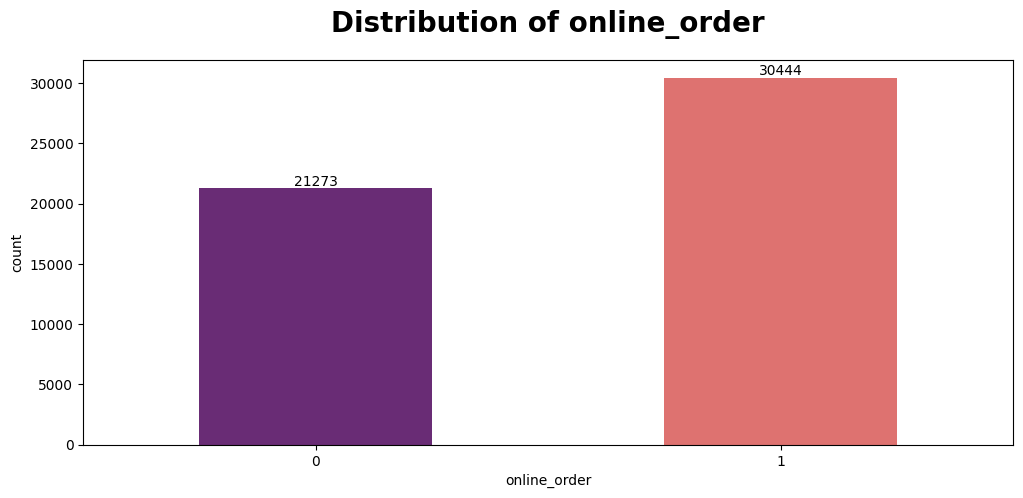

In [40]:
countplot('online_order', data)

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* **30,444** restaurants offer online orders (1), while **21,273** restaurants do not (0). This means **59.9%** of the restaurants in the dataset provide **online ordering**, while **40.1% do not**.
* The fact that more than half of the restaurants provide online orders indicates a strong market trend towards digitalization and online service adoption in the restaurant industry. This is likely driven by the increasing demand for convenience, especially after the rise of food delivery apps.

/var/folders/np/t2l3ndmn5nq7ny2gk9bg61mh0000gn/T/ipykernel_66409/1181578348.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=data, palette="magma", width=0.5)


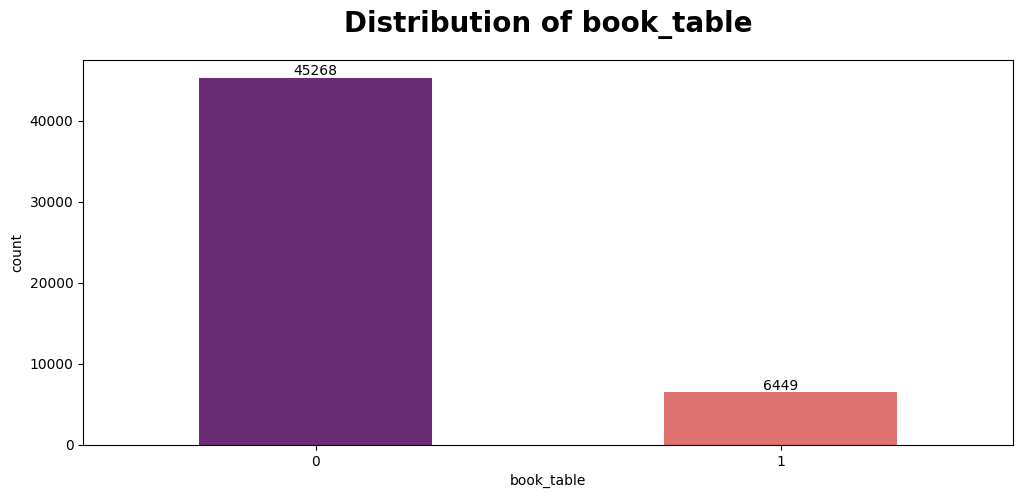

In [43]:
countplot('book_table', data)

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* **45,268** restaurants **do not offer table booking (0)**. **6,449** restaurants offer **table booking (1)**. This means that approximately 12.5% of the restaurants offer table booking, while 87.5% do not.
* The fact that only 12.5% of restaurants offer table booking suggests that table reservations are not as common compared to other services like online ordering.

/var/folders/np/t2l3ndmn5nq7ny2gk9bg61mh0000gn/T/ipykernel_66409/1181578348.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=data, palette="magma", width=0.5)


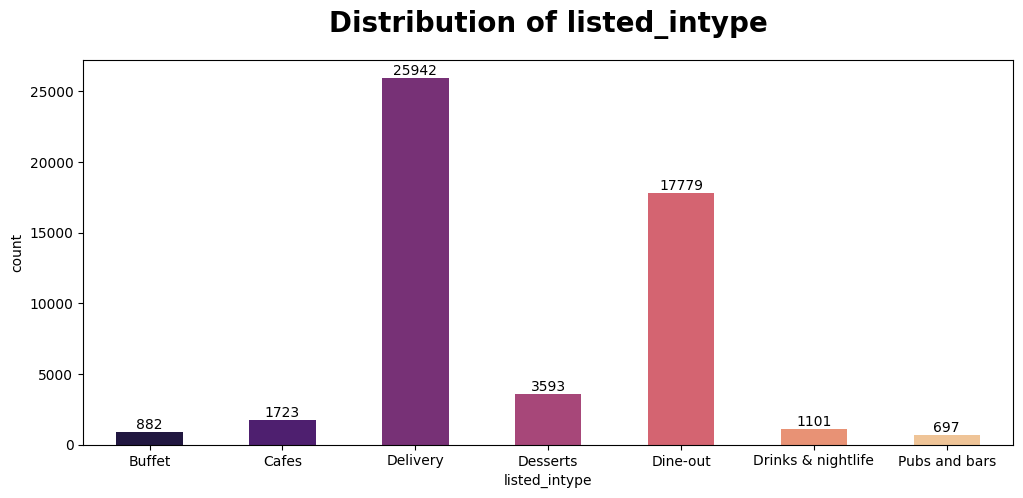

In [49]:
countplot('listed_intype', data)

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* **Delivery (25,942)** and **Dine-out (17,779)** are the top two listing types.
* **Desserts and Cafes** are niche, with moderate presence.
* **Drinks & Nightlife, Buffet, and Pubs and Bars** have the **lowest counts**, indicating they are less common.
* Majority of restaurants focus on convenience (Delivery) and social dining (Dine-out).

### Further Analysis

#### Cuisine Column 

In [61]:
## restaurants serving North Indian cuisine
north_indian = data[data['cuisines'].str.contains('North Indian')]
len(north_indian)


21085

In [62]:
## Most common cusines offered by restaurants in Bglr
data['cuisines'].value_counts().head(1)

cuisines
North Indian    2913
Name: count, dtype: int64

#### approx_costfor_two_people

In [64]:
## Highest avg cost for dining in Area wise in Blr

avg_cost_per_locality = data.groupby('listed_incity')['approx_costfor_two_people'].mean()
avg_cost_per_locality.idxmax(), avg_cost_per_locality.max()

('Church Street', 770.3612479474549)

In [82]:
data['approx_costfor_two_people'].min()

40.0

In [80]:
data['approx_costfor_two_people'].max()

6000.0

In [106]:
buffet_avg_cost = data[data['listed_intype'] == 'Buffet']['approx_costfor_two_people'].mean()
delivery_avg_cost = data[data['listed_intype'] == 'Delivery']['approx_costfor_two_people'].mean()
buffet_avg_cost - delivery_avg_cost


831.2513659898209

In [104]:
buffet_restaurants = data[data['rest_type'].str.contains('Buffet', na=False)]
len(buffet_restaurants)

0

In [105]:
data['listed_intype'].value_counts()

listed_intype
Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: count, dtype: int64

In [99]:
data.head(2)

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,1,0,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari


### Top rating restaurant

In [75]:
high_votes = data[data['votes'] > 1000]
top_rest_type = high_votes.groupby('rest_type')['rate'].max().idxmax()

In [76]:
top_rest_type

'Casual Dining'

In [93]:

filtered_data = data[data['votes'] > 1000]


rest_type_ratings = filtered_data.groupby('rest_type')['rate'].mean().sort_values(ascending=False)


print(rest_type_ratings.head(10))


rest_type
Bakery                         4.800000
Pub, Cafe                      4.657500
Cafe, Dessert Parlor           4.578261
Dessert Parlor                 4.518367
Microbrewery                   4.508333
Cafe, Casual Dining            4.485185
Microbrewery, Bar              4.446154
Microbrewery, Casual Dining    4.444444
Microbrewery, Pub              4.438095
Casual Dining, Irani Cafee     4.406667
Name: rate, dtype: float64


In [95]:
## Which locality has the most restaurants with over 500 votes and a rating below 3.0?

low_rating_high_votes = data[(data['votes'] > 500) & (data['rate'] < 3.0)]
low_rating_high_votes['listed_incity'].value_counts().head(1)


listed_incity
Brookefield    8
Name: count, dtype: int64

##### Which locality in Bangalore should Zomato target for expansion based on restaurant type diversity?

In [97]:
type_diversity = data.groupby('listed_incity')['rest_type'].nunique()
type_diversity.idxmax(), type_diversity.max()

('BTM', 62)

In [107]:
# maximum number of votes received by any restaurant with online ordering

max_votes_online_order = data[data['online_order'] == 1]['votes'].max()

max_votes_online_order

16832

In [109]:
#average rating of restaurants that serve both North Indian and Chinese cuisines

north_indian_chinese = data[data['cuisines'].str.contains('North Indian') & data['cuisines'].str.contains('Chinese')]
north_indian_chinese['rate'].mean()


3.5919080217658412

### City wise

In [87]:
total_online_orders = data[data['online_order'] == 1].shape[0]

banashankari_online_orders = data[(data['listed_incity'] == 'Banashankari') & (data['online_order'] == 1)].shape[0]

percentage = (banashankari_online_orders / total_online_orders) * 100


In [88]:
print(f"Percentage of online orders from Banashankari: {percentage:.2f}%")


Percentage of online orders from Banashankari: 1.79%


In [58]:
data['cuisines'].value_counts()

cuisines
North Indian                                   2913
North Indian, Chinese                          2385
South Indian                                   1828
Biryani                                         918
Bakery, Desserts                                911
                                               ... 
North Indian, Chinese, South Indian, Juices       1
North Indian, Chinese, Kebab, Mughlai             1
Chinese, Vietnamese, Thai, Malaysian              1
Arabian, Lebanese, Chinese, Rolls                 1
North Indian, Chinese, Arabian, Momos             1
Name: count, Length: 2724, dtype: int64

In [118]:
## most profitable area for Zomato based on potential revenue estimation?
data1 = data.copy()
data1['profitability'] = (data['votes']/data['approx_costfor_two_people']) * 100
data1.groupby('listed_incity')['profitability'].max().idxmax()

'Banashankari'

In [122]:
# Assuming 'revenue' is derived from 'approx_costfor_two_people' and 'votes'
# Calculate 'revenue' for each restaurant (approx_cost * votes)
data['revenue'] = data['approx_costfor_two_people'] * data['votes']

# Group by locality to calculate total revenue for each locality
locality_revenue = data.groupby('listed_incity')['revenue'].sum()

# Count the number of restaurants in each locality
locality_restaurant_count = data.groupby('listed_incity')['rest_type'].count()

# Calculate strike rate: Revenue per restaurant
locality_strike_rate = locality_revenue / locality_restaurant_count

# Sort by strike rate and find the most profitable locality
most_profitable_locality = locality_strike_rate.idxmax()

# Output the most profitable area
print(f"The most profitable area for Zomato based on potential revenue estimation is: {most_profitable_locality}")


The most profitable area for Zomato based on potential revenue estimation is: MG Road


In [125]:
# Display all localities and their revenue estimation
print(locality_strike_rate_sorted) 

# Find the most profitable locality based on the available options
profitable_locality_options = ['Brookefield', 'Koramangala 8th Block', 'Koramangala 7th Block', 'Bellandur']

# Filter the locality strike rate to include only the options given in the question
profitable_locality_options_strike_rate = locality_strike_rate_sorted[locality_strike_rate_sorted.index.isin(profitable_locality_options)]

# Display the most profitable locality from the options
print(f"Most profitable locality from the options: {profitable_locality_options_strike_rate.idxmax()}")


listed_incity
MG Road                  511854.925456
Church Street            489954.772852
Indiranagar              472316.252688
Brigade Road             470557.501413
Residency Road           466947.663580
Old Airport Road         457948.764912
Lavelle Road             429129.423739
Koramangala 5th Block    348240.440762
Koramangala 6th Block    345430.556615
Koramangala 7th Block    342476.381892
Bellandur                339399.682152
Koramangala 4th Block    331026.577906
Sarjapur Road            288738.612213
BTM                      281987.444343
Whitefield               252914.043210
Frazer Town              244693.434599
Malleshwaram             241362.436131
Marathahalli             219553.435805
Jayanagar                194051.982286
HSR                      181460.246984
Rajajinagar              179768.341057
Brookefield              173336.956522
New BEL Road             163049.864865
Basavanagudi             154924.008689
JP Nagar                 153245.749046
Bannerghatt

In [127]:
# If Zomato wants to reduce customer complaints, which restaurant type should they focus on?

low_rating_rest_types = data.groupby('rest_type')['rate'].min()
low_rating_rest_types.idxmin()


'Casual Dining'

In [128]:
# Define the list of restaurant types mentioned in the options
options = ['Bakery, Beverage Shop', 'Sweet Shop, Quick Bites', 'Quick Bites', 'Fine Dining']

# Filter the data to include only the relevant restaurant types
filtered_data = data[data['rest_type'].isin(options)]

# Find the restaurant type with the lowest rating from the filtered data
low_rating_rest_types = filtered_data.groupby('rest_type')['rate'].min()

# Identify the restaurant type with the lowest rating
lowest_rated_rest_type = low_rating_rest_types.idxmin()

print(f"The restaurant type Zomato should focus on to reduce customer complaints is: {lowest_rated_rest_type}")


The restaurant type Zomato should focus on to reduce customer complaints is: Quick Bites


#### In which area should Zomato invest by considering high rating (rate > 4.2), high number of votes (> 500) and including online orders?

In [130]:
high_rating_votes = data[(data['rate'] > 4.2) & (data['votes'] > 500) & (data['online_order'] == 1)]


high_rating_votes['listed_incity'].value_counts().head(1)

listed_incity
Koramangala 7th Block    97
Name: count, dtype: int64

### Distribution of Restaurant Ratings

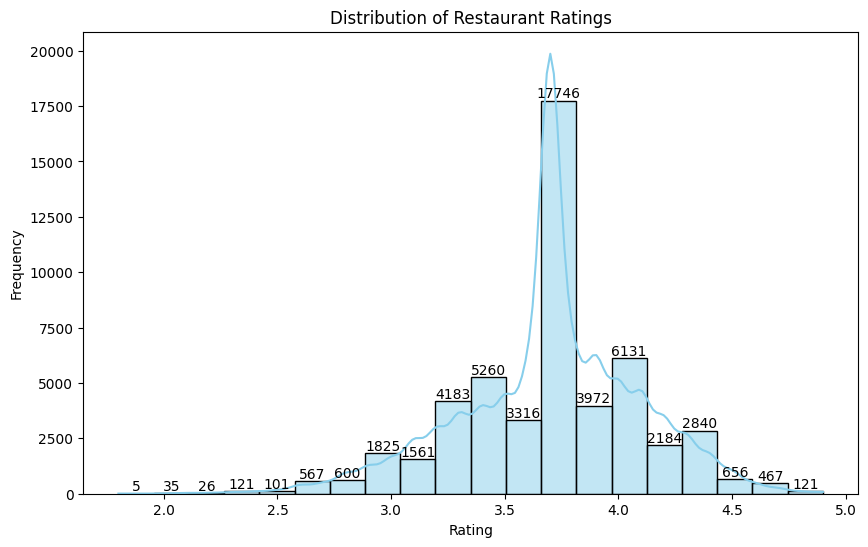

In [147]:

plt.figure(figsize=(10,6))
ax=sns.histplot(data['rate'], bins=20, kde=True, color='skyblue')
for i in ax.containers:
        ax.bar_label(i)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* Most of the restaurants are rated between **3.5 to 4.0** peaking at **3.9** with **17746 ratings**.
* Very few have ratings below **3.0** or above **4.5**.
* Suggests that **average to good ratings dominate** Bglr's restaurant scene

### Distribution of Costs for Two People

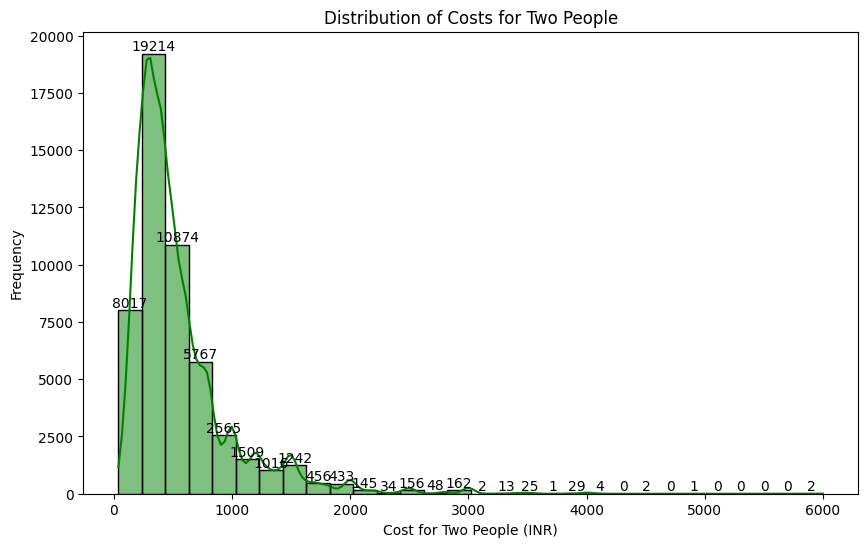

In [146]:

plt.figure(figsize=(10,6))
ax=sns.histplot(data['approx_costfor_two_people'], bins=30, kde=True, color='green')
for i in ax.containers:
        ax.bar_label(i)
plt.title('Distribution of Costs for Two People')
plt.xlabel('Cost for Two People (INR)')
plt.ylabel('Frequency')
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* Majority of restaurants have a **cost for two below 500, peaking at 400-500**.
* Cost sharply **drops after 800**, showing fewer premium options.
* Indicates Bglr's food market is largely **budget-friendly and mid-range**

### Restaurant Type Counts

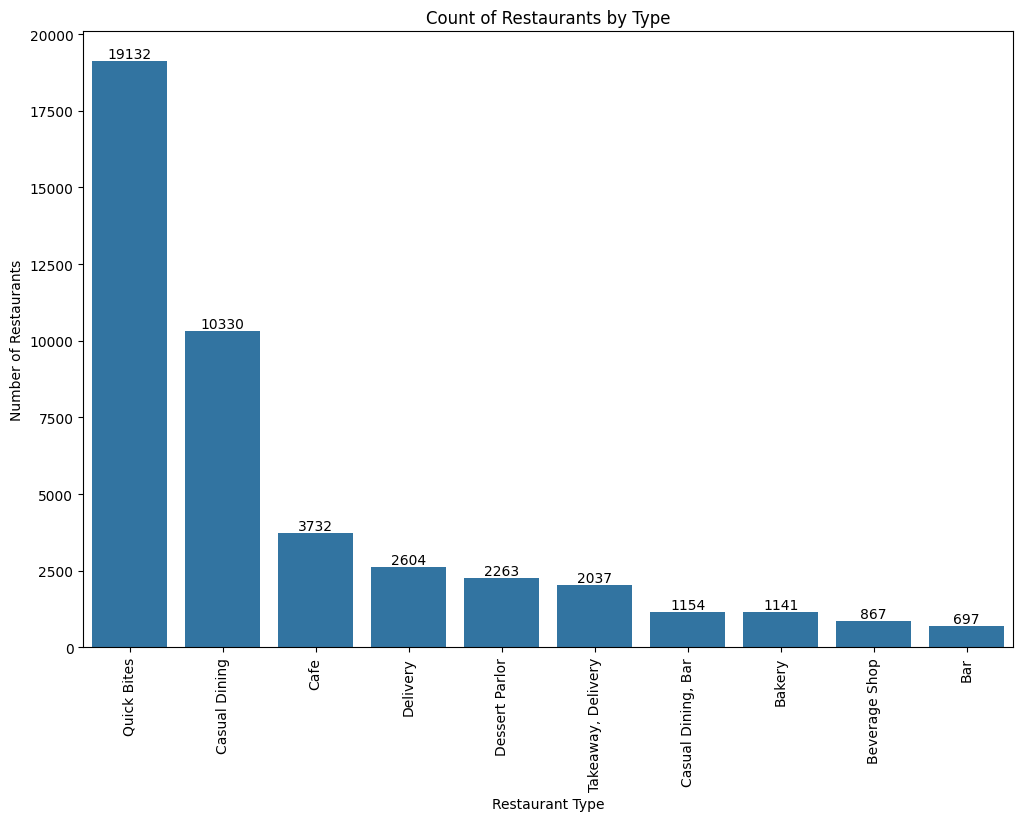

In [145]:

plt.figure(figsize=(12,8))
ax = sns.countplot(data=data, x='rest_type', order=data['rest_type'].value_counts().head(10).index)
for i in ax.containers:
        ax.bar_label(i)
plt.title('Count of Restaurants by Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* **Quick Bites** dominates with 19312 rest, followed by **casual dining(10330)**
* **Cafes, dessert parlors, delivery** options are fewer but still significant
* **Bars, beverage shops, fine dining** are much fewer in number.
* Suggests Bangalore's food scene is **casual, fast-paced and convinience-driven**

### Top 10 Localities by Number of Restaurants

/var/folders/np/t2l3ndmn5nq7ny2gk9bg61mh0000gn/T/ipykernel_66409/641735995.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_localities.index, y=top_10_localities.values, palette="viridis")


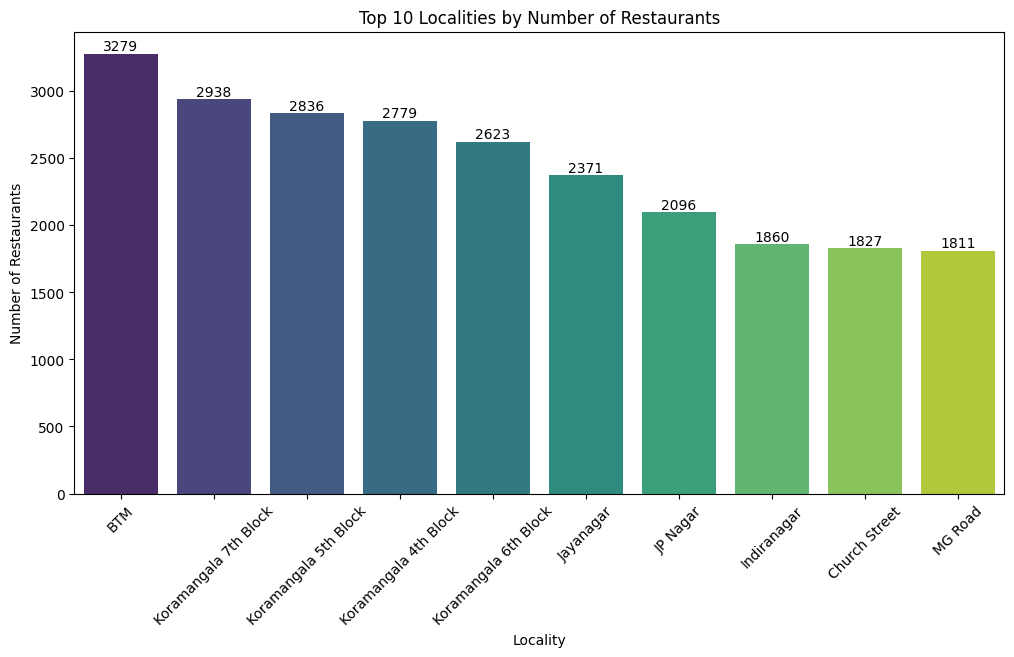

In [149]:

top_10_localities = data['listed_incity'].value_counts().head(10)
plt.figure(figsize=(12,6))
ax = sns.barplot(x=top_10_localities.index, y=top_10_localities.values, palette="viridis")
for i in ax.containers:
        ax.bar_label(i)
plt.title('Top 10 Localities by Number of Restaurants')
plt.xlabel('Locality')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* **BTM** tops the list with the **highest number of restaurants(3279)**
* **Koramangala** is a major food hub, with **3 blocks(7th, 5th, 4th)** in top 5
* **Populat areas like Jayanagar, JP Nagar, Indiranagar, CHurch Street, MGRoad** also have a high restaurant density
* Indicates strong food business presence in **South and Central Bangalore**


### Correlation Heatmap

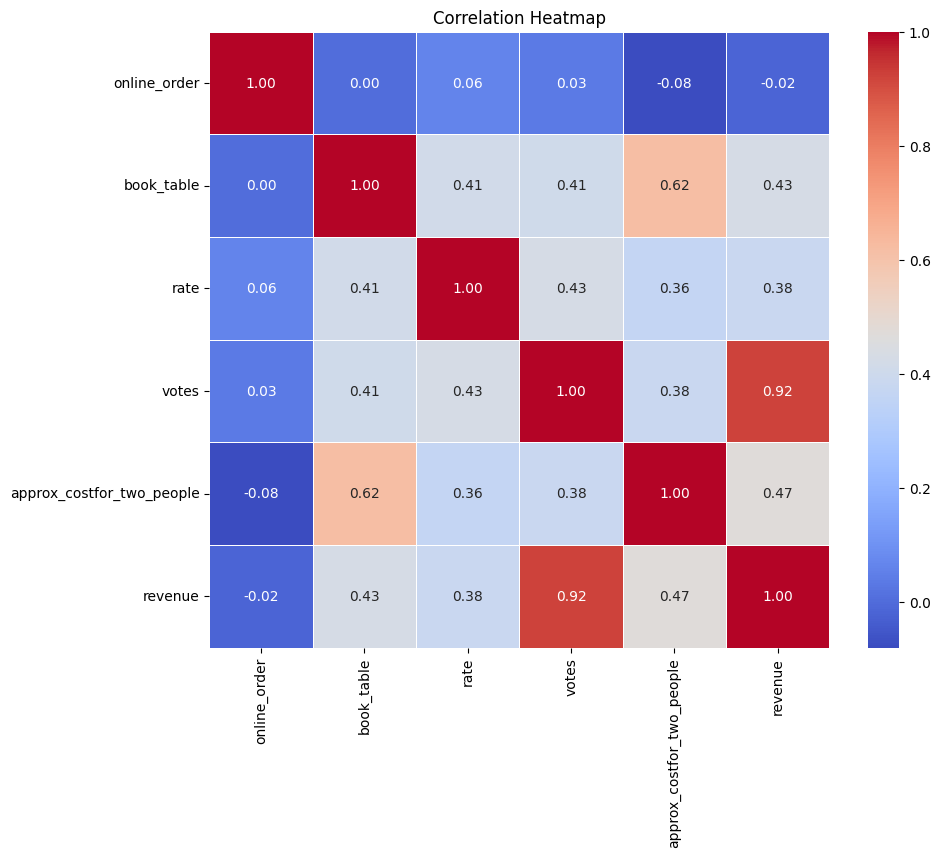

In [150]:

# First, we'll select only the numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* **Votes & Revenue** have a strong correlation
* **Cost for two people** is **moderately correlated** with **booking table(0.62)** and *8revenue**
* **ratings** show only **weak to moderate correlation** with other factors
* **Online ordering** has **almost no correlation** with any variable

### Ratings vs. Cost for Two People

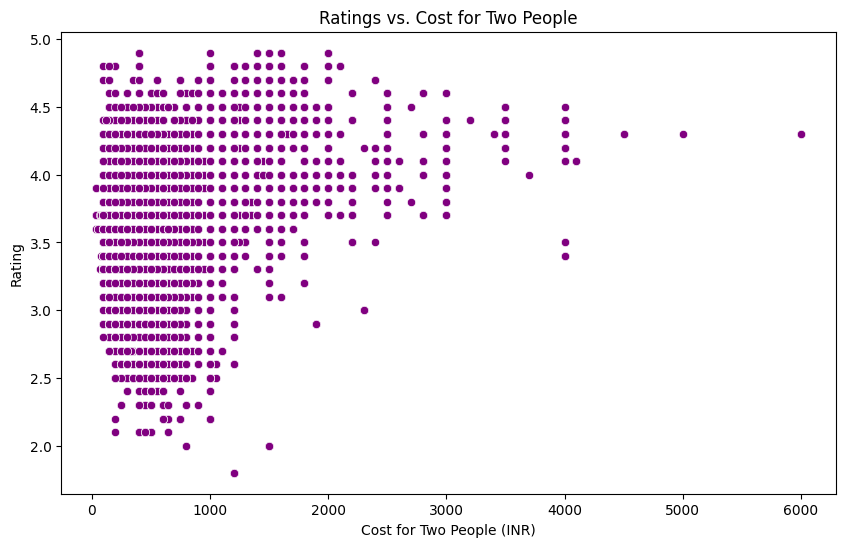

In [152]:

plt.figure(figsize=(10,6))
sns.scatterplot(x=data['approx_costfor_two_people'], y=data['rate'], color='purple')
plt.title('Ratings vs. Cost for Two People')
plt.xlabel('Cost for Two People (INR)')
plt.ylabel('Rating')
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* **Most restaurants** cost between **200-800**
* **High ratings (4+)** are common even at **low to mid prices**
* **No strong link** between higher cost and better rating
* **Expensive places** are fewer and dont always rate higher
* **Very few low-rated** restaurants overall

### Ratings Distribution by Restaurant Type

/var/folders/np/t2l3ndmn5nq7ny2gk9bg61mh0000gn/T/ipykernel_66409/3707856293.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rest_type', y='rate', data=data, palette="Set2")


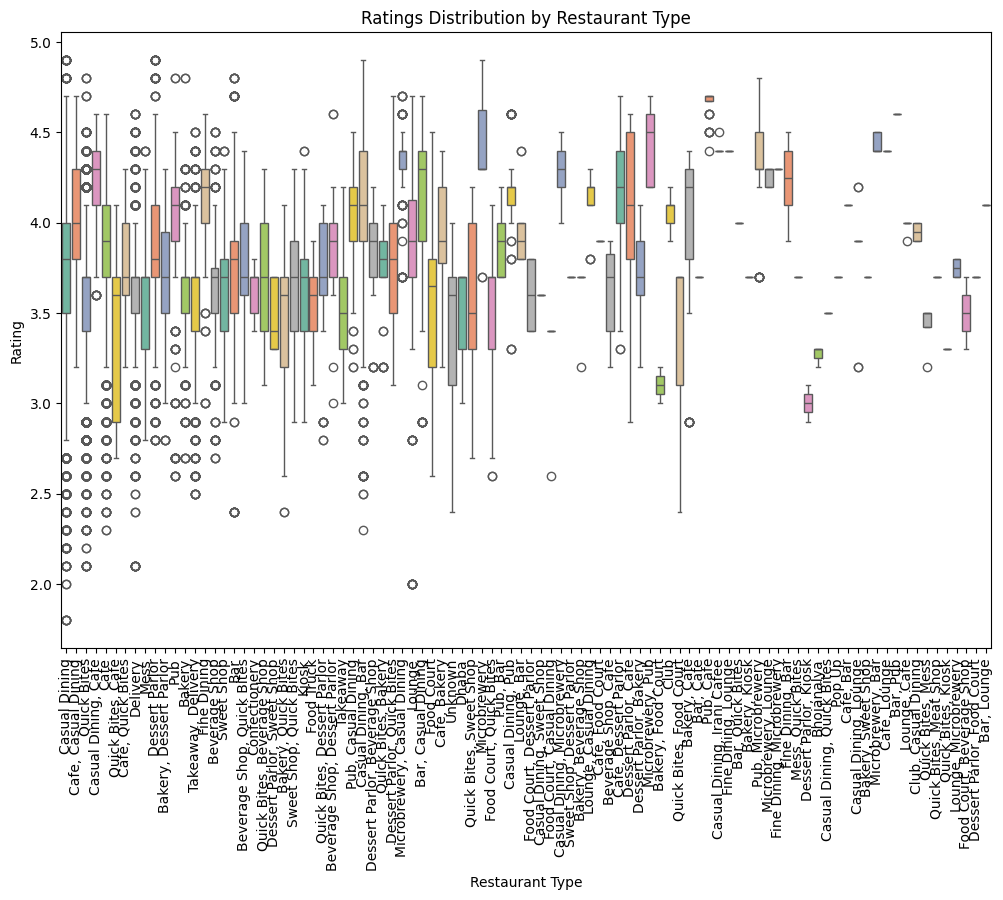

In [153]:

plt.figure(figsize=(12,8))
sns.boxplot(x='rest_type', y='rate', data=data, palette="Set2")
plt.title('Ratings Distribution by Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

###  Location-wise Average Rating vs Cost

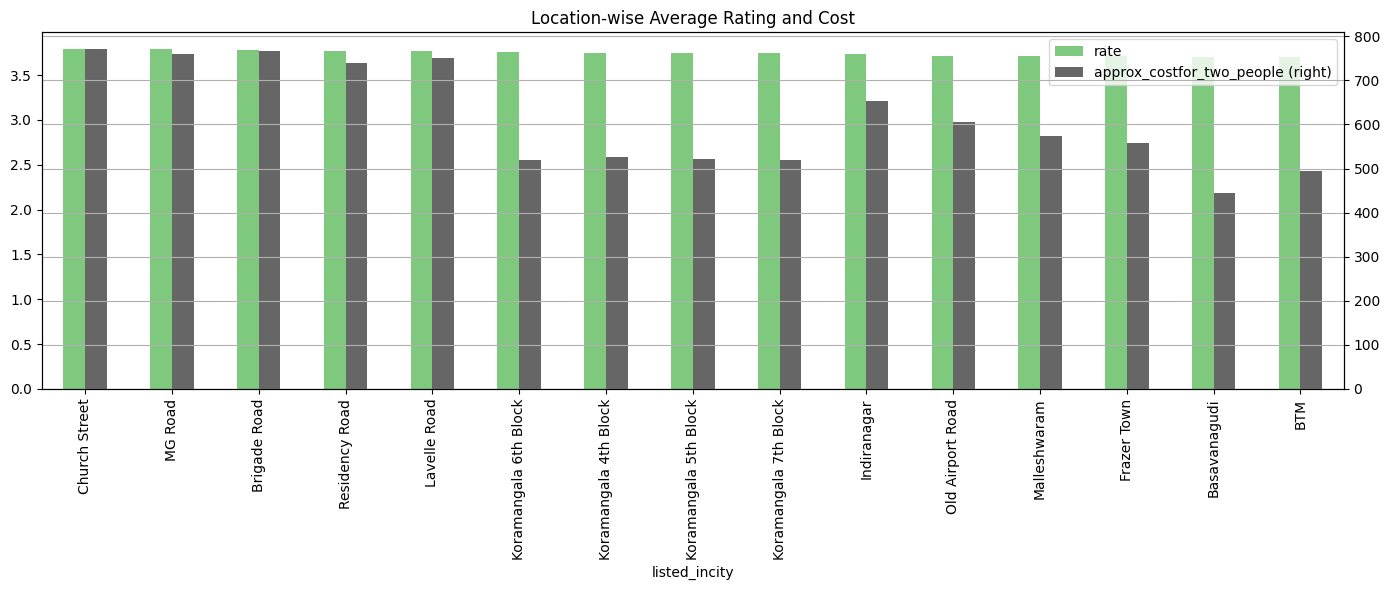

In [159]:
loc_rating_cost = data.groupby('listed_incity')[['rate', 'approx_costfor_two_people']].mean().sort_values('rate', ascending=False).head(15)

loc_rating_cost.plot(kind='bar', figsize=(14,6), secondary_y='approx_costfor_two_people', colormap='Accent')
plt.title('Location-wise Average Rating and Cost')
plt.xlabel('Location')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* **Church Street, MG Road, and Brigade Road** top the chart in both ratings and cost, showing these are **premium, well-rated zones**.
* **Koramangala blocks (4th to 7th)** have **moderate ratings** (3.74) but much **lower average costs** (520), making them budget-friendly and consistent spots.
* **Basavanagudi and BTM** have the lowest average costs, but also slightly lower ratings, which may suggest trade-offs in experience or variety.
* **Indiranagar and Old Airport Road** strike a good balance between decent ratings and moderate pricing, appealing to mid-range diners.

###  Most Popular Cuisines

/var/folders/np/t2l3ndmn5nq7ny2gk9bg61mh0000gn/T/ipykernel_66409/1115323872.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cuisine_df, x='Cuisine', y='Count', palette='rocket')


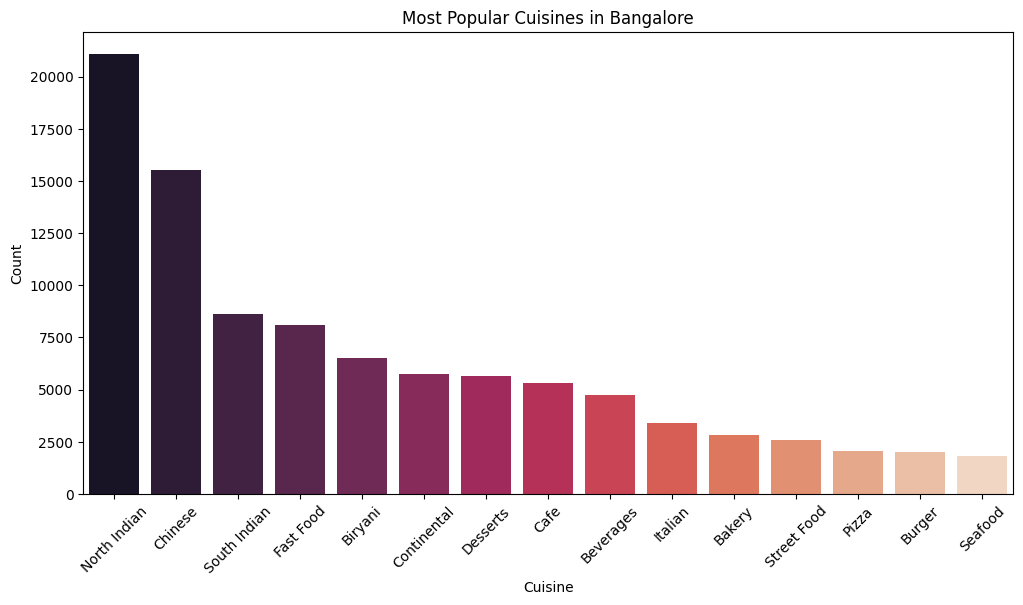

In [160]:
from collections import Counter


cuisines = data['cuisines'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])
flat_cuisines = [item for sublist in cuisines for item in sublist]
cuisine_counts = Counter(flat_cuisines)

# Convert to DataFrame and plot
cuisine_df = pd.DataFrame(cuisine_counts.items(), columns=['Cuisine', 'Count']).sort_values(by='Count', ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(data=cuisine_df, x='Cuisine', y='Count', palette='rocket')
plt.xticks(rotation=45)
plt.title('Most Popular Cuisines in Bangalore')
plt.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* **North Indian and Chinese** are the **top two cuisines** by a wide margin, showing their massive popularity across the region.
* **South Indian, Fast Food, and Biryani** also have **strong followings**, indicating a mix of traditional and quick-eat preferences.
* **Continental, Desserts, and Cafes** highlight a growing demand for Western and casual dining experiences.
* **Niche cuisines like Seafood, Burger, and Pizza** have **smaller counts**, suggesting either limited availability or specific audience appeal.

In [164]:
cuisine_df

,Cuisine,Count
0,North Indian,21085
2,Chinese,15547
7,South Indian,8644
14,Fast Food,8096
21,Biryani,6492
11,Continental,5765
20,Desserts,5633
4,Cafe,5303
13,Beverages,4747
6,Italian,3389


### Heatmap of Restaurants by Rating Bucket and Cost Range

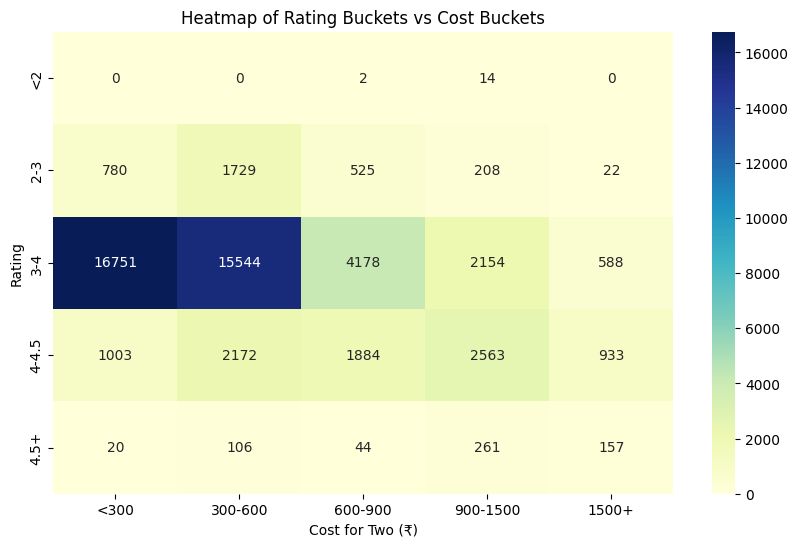

In [161]:
data['rating_bucket'] = pd.cut(data['rate'], bins=[0, 2, 3, 4, 4.5, 5], labels=['<2', '2-3', '3-4', '4-4.5', '4.5+'])
data['cost_bucket'] = pd.cut(data['approx_costfor_two_people'], bins=[0, 300, 600, 900, 1500, 3000], 
                              labels=['<300', '300-600', '600-900', '900-1500', '1500+'])

heatmap_data = pd.crosstab(data['rating_bucket'], data['cost_bucket'])

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Rating Buckets vs Cost Buckets')
plt.xlabel('Cost for Two (₹)')
plt.ylabel('Rating')
plt.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* The majority of highly rated restaurants fall in the 300–900 range, especially in the ₹600–₹900 bucket, suggesting customers perceive this range as the sweet spot for value + quality.
* Very few top-rated places exist below 300 or above 1500, indicating that extremely cheap or very expensive options may not consistently impress customers.
* The 900–1500 range still has a significant number of well-rated places, showing premium diners value quality but expect it to match the price.
* The <300 bucket has poor representation in high-rating zones, could suggest compromised experience or limited services in budget eateries.

### Top Cuisine by Area

In [162]:
top_cuisine_by_loc = data.groupby('listed_incity')['cuisines'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown')

top_cuisine_by_loc = top_cuisine_by_loc.reset_index()
top_cuisine_by_loc.columns = ['Location', 'Top Cuisine']
top_cuisine_by_loc.head(10)


,Location,Top Cuisine
0,BTM,North Indian
1,Banashankari,South Indian
2,Bannerghatta Road,"North Indian, Chinese"
3,Basavanagudi,South Indian
4,Bellandur,North Indian
5,Brigade Road,North Indian
6,Brookefield,North Indian
7,Church Street,North Indian
8,Electronic City,"North Indian, Chinese"
9,Frazer Town,North Indian


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* ✅ **North Indian** dominates most areas like **BTM, Bellandur, Brigade Road, Brookefield**, and more showing it's the most preferred cuisine across Bangalore.
* ✅ **South Indian** is highly preferred in **Banashankari and Basavanagudi**, indicating a strong local taste influence.
* ✅ **Chinese** appears as a top pairing with **North Indian** in areas like **Bannerghatta Road and Electronic City**, reflecting demand for multi-cuisine options in these busy localities.

### Top combinations of rest_type + cuisines with high ratings.

In [163]:
data['combo'] = data['rest_type'] + ' | ' + data['cuisines'].fillna('Unknown')
top_combos = data.groupby('combo').agg({'rate': 'mean', 'votes': 'sum'}).sort_values(by='rate', ascending=False).head(10)
top_combos


,rate,votes
combo,,
"Casual Dining, Bar | Asian, Chinese, Thai, Momos",4.900000,42273
"Casual Dining | Healthy Food, Salad, Mediterranean",4.900000,246
"Microbrewery | Continental, North Indian, Italian, South Indian, Finger Food",4.900000,99531
"Casual Dining | Asian, Mediterranean, North Indian, BBQ",4.800000,29956
"Casual Dining | Italian, Pizza, Beverages",4.800000,10523
"Pub | European, Continental",4.800000,9401
"Casual Dining, Bar | North Indian, European, Mediterranean, BBQ",4.800000,35637
"Casual Dining, Bar | American, Tex-Mex, Burger, BBQ, Mexican",4.800000,38707
"Casual Dining | European, Mediterranean, North Indian, BBQ",4.789474,86418


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* ✅ "Microbrewery | Continental, North Indian, Italian, South Indian, Finger Food" has the highest customer count (99,531) and a perfect 4.9 rating — highly loved and widely visited.
* ✅ Casual Dining with Asian or Mediterranean cuisines appears frequently among top-rated combinations — showing strong customer preference.
* ✅ Bar + North Indian/BBQ/Mediterranean combos consistently score high (4.8+), indicating popularity for food + drinks experiences.
* ✅ Even niche combos like "Healthy Food, Salad, Mediterranean" maintain a 4.9 rating, suggesting a loyal health-conscious customer base despite fewer visits.

<a id="1"></a>
# <div style="padding:20px;color:brown;margin:0;font-size:25px;font-family:Calibri;text-align:center;display:fill;border-radius:5px;background-color:lightyellow;overflow:hidden"><b> Interactive Restaurant Density Mapping using and IPython</b></div>

In [133]:
!pip install folium

In [134]:
!pip install IPython

In [135]:
df = pd.read_csv('merged_data.csv')

In [137]:
df.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity,Latitude,Longitude
0,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,12.939333,77.553982
1,1,0,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari,12.939333,77.553982
2,1,0,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,12.939333,77.553982
3,0,0,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari,12.939333,77.553982
4,0,0,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari,12.939333,77.553982


In [171]:
import folium
from folium.plugins import MarkerCluster
from IPython.display import IFrame

# Create a base map centered around average coordinates
map_center = [df["Latitude"].mean(), df["Longitude"].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=12)

# Add marker cluster to map
marker_cluster = MarkerCluster().add_to(restaurant_map)

# Loop through the DataFrame and add markers
for index, row in df.iterrows():
    if pd.notnull(row["Latitude"]) and pd.notnull(row["Longitude"]):
        popup_text = f"""
        <b>City:</b> {row['listed_incity']}<br>
        <b>Rating:</b> {row['rate']}<br>
        <b>Cost for Two:</b> ₹{row['approx_costfor_two_people']}
        """
        folium.Marker(
            location=[row["Latitude"], row["Longitude"]],
            popup=popup_text,
            icon=folium.Icon(color='blue', icon='cutlery', prefix='fa')
        ).add_to(marker_cluster)

# Save map as HTML
restaurant_map.save("restaurant_density.html")

# Display the map inside notebook
IFrame("restaurant_density.html", width=800, height=500)


### Italian Cusine Map

In [174]:
import folium
from folium.plugins import MarkerCluster
from IPython.display import IFrame

# Step 1: Filter the data for Italian restaurants
italian_df = df[df['cuisines'].str.contains("Italian", case=False, na=False)]

# Step 2: Create a map centered around average coordinates of Italian restaurants
map_center = [italian_df["Latitude"].mean(), italian_df["Longitude"].mean()]
italian_map = folium.Map(location=map_center, zoom_start=12)

# Step 3: Add marker cluster
marker_cluster = MarkerCluster().add_to(italian_map)

# Step 4: Loop through filtered data and add markers
for index, row in italian_df.iterrows():
    if pd.notnull(row["Latitude"]) and pd.notnull(row["Longitude"]):
        popup_text = f"""
        <b>City:</b> {row['listed_incity']}<br>
        <b>Rating:</b> {row['rate']}<br>
        <b>Cost for Two:</b> ₹{row['approx_costfor_two_people']}
        """
        folium.Marker(
            location=[row["Latitude"], row["Longitude"]],
            popup=popup_text,
            icon=folium.Icon(color='green', icon='cutlery', prefix='fa')
        ).add_to(marker_cluster)

# Step 5: Save and display the map
italian_map.save("italian_restaurants_map.html")
IFrame("italian_restaurants_map.html", width=800, height=500)


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=blue>Insights:</font></h3>

* Italian restaurants tend to be concentrated in upscale, urban areas such as Indiranagar, Koramangala, and MG Road. This suggests a higher demand for international cuisine in these premium localities.